# Importing the required modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

from sklearn.preprocessing import OneHotEncoder

# Reading the dataset

In [2]:
df = pd.read_csv("credit-approval.data",header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


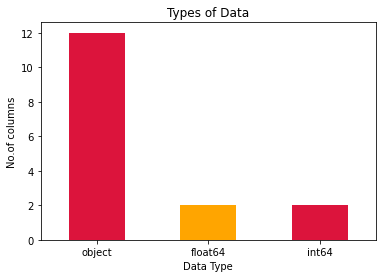

In [5]:
df.dtypes.value_counts().plot(kind="bar",
                              title="Types of Data",
                              xlabel="Data Type",
                              ylabel="No.of columns",
                              rot=0,
                              color=["crimson","orange"])
plt.show()

# Exploratory Data Analysis

## Seggregating columns

In [6]:
cat_cols = []
num_cols = []

for i in df.columns:
    if df[i].dtype == "O":
        cat_cols.append(i)
    else:
        num_cols.append(i)

In [7]:
cat_cols

[0, 1, 3, 4, 5, 6, 8, 9, 11, 12, 13, 15]

In [8]:
num_cols

[2, 7, 10, 14]

## Missing Values Analysis

In [9]:
null_freq = []
for i in df.columns:
    f = dict(df[i].value_counts())
    if "?" in f.keys():
        null_freq.append(f["?"]*100/len(df))
    else:
        null_freq.append(0)

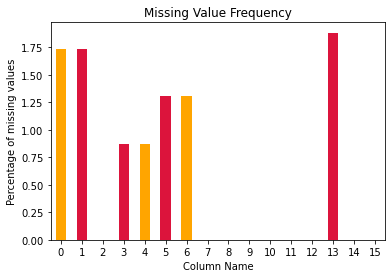

In [10]:
pd.Series(dict(zip(df.columns,null_freq))).plot(kind="bar",
                                                rot=0,
                                                title="Missing Value Frequency",
                                                xlabel="Column Name",
                                                ylabel="Percentage of missing values",
                                                color=["orange","crimson"])
plt.show()

## Target Variable Analysis

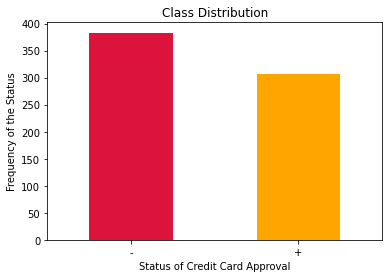

In [11]:
df[15].value_counts().plot(kind="bar",
                           title="Class Distribution",
                           xlabel="Status of Credit Card Approval",
                           ylabel="Frequency of the Status",
                           color=["crimson","orange"],
                           rot=0)
plt.show()

# Pre-processing

## Handling Missing Values

In [12]:
df = df.replace({"?":None})

In [13]:
df = df.dropna()

## Encoding the columns

In [19]:
encoder = OneHotEncoder(sparse=False)
for i in cat_cols:
    df[i] = encoder.fit_transform(df[i].values.reshape(-1,1))

In [54]:
df = df.reset_index()

# Test Train Split

In [202]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,
    df[15],
    test_size = 0.10,
    train_size=0.90,
    random_state = 0
)
X_train.pop(15)
X_test.pop(15)

535    1.0
492    1.0
14     1.0
247    0.0
85     0.0
      ... 
506    0.0
266    0.0
155    1.0
403    0.0
18     1.0
Name: 15, Length: 66, dtype: float64

In [203]:
X_train

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
436,459,0.0,0.0,0.290,0.0,0.0,0.0,0.0,1.500,1.0,1.0,0,0.0,1.0,0.0,0
75,76,0.0,0.0,6.500,0.0,1.0,1.0,0.0,0.125,0.0,1.0,0,0.0,1.0,0.0,0
55,55,0.0,0.0,11.625,0.0,0.0,0.0,0.0,0.835,0.0,1.0,0,0.0,1.0,0.0,300
49,49,0.0,0.0,0.665,0.0,1.0,0.0,0.0,0.165,1.0,1.0,0,1.0,1.0,0.0,0
589,623,0.0,0.0,0.000,0.0,1.0,0.0,0.0,0.665,1.0,1.0,0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,9,0.0,0.0,4.915,0.0,0.0,0.0,0.0,3.165,0.0,1.0,0,0.0,1.0,0.0,1442
359,377,0.0,0.0,0.835,0.0,0.0,0.0,0.0,2.000,1.0,1.0,0,0.0,0.0,0.0,0
192,197,0.0,0.0,7.625,0.0,1.0,0.0,0.0,15.500,0.0,0.0,12,1.0,1.0,1.0,790
629,665,0.0,0.0,0.040,0.0,0.0,0.0,0.0,0.040,1.0,1.0,0,1.0,1.0,1.0,0


# Perceptron

In [252]:
class Perceptron:
    def __init__(self, X, y, learning_rate, epochs : int):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def __activation_function(self,x):
        return 1.0 if (x > 0) else 0.0
    
    def fit(self):
        n_rows,n_cols = self.X.shape
        self.weights = np.zeros((n_cols + 1, 1))
        for epoch in range(self.epochs):
            for index, features in enumerate(self.X.values):
                feature_transposed = np.insert(features, 0, 1).reshape(-1,1)
                predicted_target = self.__activation_function(np.dot(feature_transposed.T, self.weights))
                flag = np.squeeze(predicted_target) - self.y[index]
                if flag != 0:
                    self.weights += self.learning_rate*((self.y[index] - predicted_target)*feature_transposed)
                    
    def predict(self, X_test):
        return self.__activation_function(np.dot(p.weights.reshape(1,-1)[0],X_test))
    
    def test(self, test_data, y):
        x = []
        for i in range(len(test_data.values)):
            X_test = np.array(test_data.iloc[i])
            x.append(p.predict(np.insert(X_test,0,1)) == p.y[i])
        return sum(x)*100/len(test_data)

# Initialising the Perceptron Parameters

In [253]:
y = np.array(pd.DataFrame(y_train).reset_index().drop(["index"],axis=1))
X = pd.DataFrame(X_train).reset_index().drop(["index"],axis=1)
p = Perceptron(X, y, 0.5, 50)

# Fitting the model

In [254]:
p.fit()

# Test Accuracy

In [257]:
p.test(pd.DataFrame(X_test).reset_index().drop(["index"],axis=1),
     np.array(pd.DataFrame(y_test).reset_index().drop(["index"],axis=1)))

array([51.51515152])

# Train Accuracy

In [258]:
p.test(X,y)

array([76.66098807])

# Tuning the number of epochs

In [262]:
train_acc = []
test_acc = []
epochs = []

for i in range(20,200,20):
    y = np.array(pd.DataFrame(y_train).reset_index().drop(["index"],axis=1))
    X = pd.DataFrame(X_train).reset_index().drop(["index"],axis=1)
    p = Perceptron(X, y, 0.5, i)
    p.fit()
    train_acc.append(p.test(X,y))
    test_acc.append(p.test(pd.DataFrame(X_test).reset_index().drop(["index"],axis=1),
     np.array(pd.DataFrame(y_test).reset_index().drop(["index"],axis=1))))
    epochs.append(i)

# Train-Test Accuracies across different epochs

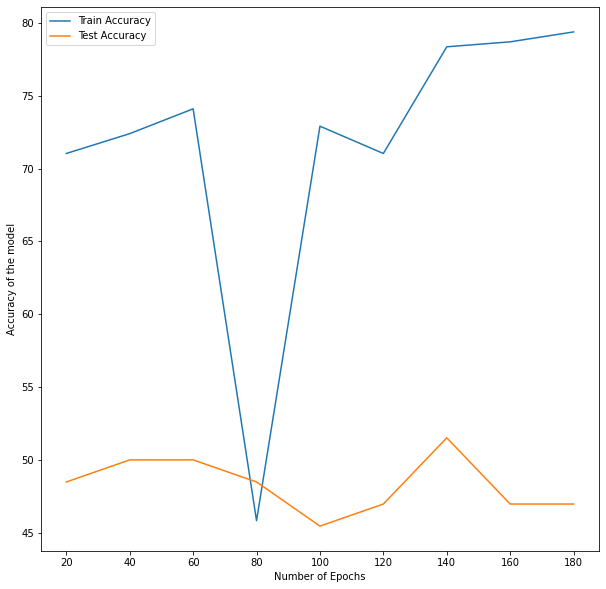

In [264]:
plt.figure(figsize=(10,10))
plt.plot(epochs,train_acc)
plt.plot(epochs,test_acc)
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy of the model")
plt.legend(['Train Accuracy',"Test Accuracy"])
plt.show()